In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [4]:
y_binary = ['high' if i>20 else 'low' for i in boston.target]
y_logistic = pd.factorize(y_binary)[0]

In [5]:
y_logistic

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [6]:
medv_codes = pd.factorize(y_binary)[1]

In [7]:
print(Counter(y_binary))

Counter({'high': 291, 'low': 215})


In [8]:
def train_test_split(x_data, y_data, percentage=0.8):
    mak = np.random.rand(len(y_data))< percentage
    x_train, x_test = x_data[mak], x_data[~mak]
    y_train, y_test = y_data[mak], y_data[~mak]
    
    return x_train, x_test, y_train, y_test

In [9]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, y_logistic)

## Fitting a logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
pred_train = logistic.predict(x_train)
pred_test = logistic.predict(x_test)

In [14]:
pred_test

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0], dtype=int64)

In [15]:
pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

## Evaluation Metrics for Classifications

In [21]:
def performance_metrix(true_values, pred_values):
    print('accuracy: {}'.
         format(sklearn.metrics.accuracy_score(true_values, pred_values)))
    
    print('AUC: {}'.
         format(sklearn.metrics.roc_auc_score(true_values, pred_values)))
    
    cm = sklearn.metrics.confusion_matrix(true_values, pred_values)
    
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xticks(range(2), ['High', 'Low'])
    plt.yticks(range(2), ['High', 'Low'])
    plt.colorbar()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')

accuracy: 0.8883116883116883
AUC: 0.8812384988568561


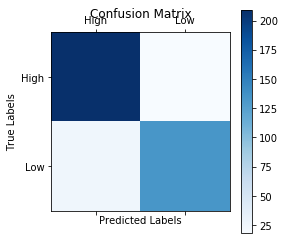

In [22]:
performance_metrix(y_train, pred_train)

accuracy: 0.8677685950413223
AUC: 0.8682839912280702


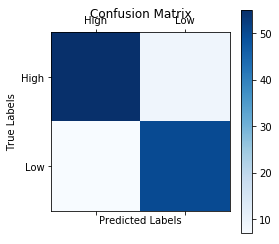

In [23]:
performance_metrix(y_test, pred_test)

# Random Forests

In [24]:
# This 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred_train_clf = clf.predict(x_train)
pred_test_clf = clf.predict(x_test)

feature_imp = list(zip(clf.feature_importances_, boston.feature_names))

In [25]:
feature_imp

[(0.081221013329782626, 'CRIM'),
 (0.0036291424477946643, 'ZN'),
 (0.061204181410922008, 'INDUS'),
 (0.0031349698603970076, 'CHAS'),
 (0.099272726537242922, 'NOX'),
 (0.11416550850490732, 'RM'),
 (0.080045145512976951, 'AGE'),
 (0.042830398150953665, 'DIS'),
 (0.017870869562390809, 'RAD'),
 (0.045674111586925206, 'TAX'),
 (0.041100393353266554, 'PTRATIO'),
 (0.028516472496760502, 'B'),
 (0.38133506724567973, 'LSTAT')]

# Feature Selection

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, f_regression, mutual_info_regression

lm = LinearRegression()
new_lm = RFE(lm, 5)
fit = new_lm.fit(x_train, y_train)

In [29]:
rank = fit.ranking_
print(rank)

[6 9 3 1 1 4 5 1 2 7 1 8 1]


In [30]:
for num, feature in enumerate(boston.feature_names):
    print("{}: rank {}".format(feature, rank[num]))

CRIM: rank 6
ZN: rank 9
INDUS: rank 3
CHAS: rank 1
NOX: rank 1
RM: rank 4
AGE: rank 5
DIS: rank 1
RAD: rank 2
TAX: rank 7
PTRATIO: rank 1
B: rank 8
LSTAT: rank 1


# f_regression

In [34]:
F,p_values = f_regression(x_train, y_train)
for num, feature in enumerate(boston.feature_names):
    print("{}: p.value {}".format(feature, p_values[num]))

CRIM: p.value 2.5028127175021533e-12
ZN: p.value 3.8768577118446676e-10
INDUS: p.value 7.188956590324633e-22
CHAS: p.value 0.013557848637877078
NOX: p.value 4.0689046859020953e-25
RM: p.value 8.533600565983988e-23
AGE: p.value 1.3873190116866527e-26
DIS: p.value 9.783933583088242e-12
RAD: p.value 3.139295419056949e-15
TAX: p.value 6.627546079787873e-23
PTRATIO: p.value 1.0205338147446191e-17
B: p.value 7.764550214812044e-13
LSTAT: p.value 2.9637731570285838e-59


# Mutual Regression

In [35]:
mi = mutual_info_regression(x_train, y_train)
for i, feature in enumerate(boston.feature_names):
    print("{}: MI {}".format(feature, mi[i]))

CRIM: MI 0.173822908621883
ZN: MI 0.058819381213431665
INDUS: MI 0.25066462363289954
CHAS: MI 0.04663401247085419
NOX: MI 0.2892816475370008
RM: MI 0.1596756251856073
AGE: MI 0.15908321273477544
DIS: MI 0.1536367425809093
RAD: MI 0.09453983126390941
TAX: MI 0.21318871649233717
PTRATIO: MI 0.21722561223869885
B: MI 0.11378012295388462
LSTAT: MI 0.33043867132503646


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
